In [6]:
!pip install pycocotools
import os
from pycocotools.coco import COCO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 8.6 MB/s eta 0:00:00:00:01


In [7]:
dataDir = '/kaggle/input/coco-image-caption'
dataType = 'val2017'  # or 'train2017' for training data

instances_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/instances_{}.json'.format(dataType))
captions_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/captions_{}.json'.format(dataType))

# Check if the paths are correct
print(os.path.exists(instances_annFile))  # Should return True
print(os.path.exists(captions_annFile))   # Should return True


True
True


In [8]:
# Initialize COCO API for instance annotations
coco = COCO(instances_annFile)

# Initialize COCO API for caption annotations
coco_caps = COCO(captions_annFile)

# Get image ids
ids = list(coco.anns.keys())
print(f"Number of annotations: {len(ids)}")


loading annotations into memory...
Done (t=1.41s)
creating index...
index created!
loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
Number of annotations: 36781


http://images.cocodataset.org/val2017/000000187144.jpg


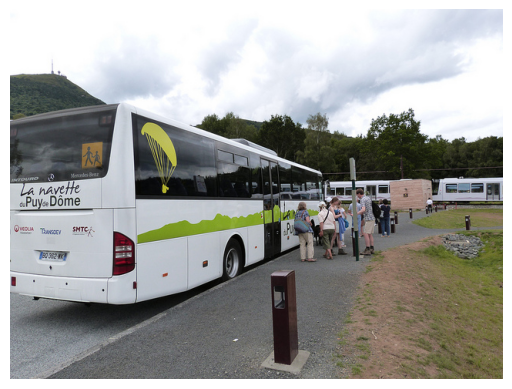

 A white bus parked at a stop next to a crowd.
THERE IS A BUS PARKED ON THE SIDE OF THE STREET
A white bus is pulled up to a sidewalk.
Passengers standing outside a green and white tour bus.
A group of people stand on a path outside a parked bus. 


In [9]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [10]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Caption:  A white bus parked at a stop next to a crowd.
Tokens: ['a', 'white', 'bus', 'parked', 'at', 'a', 'stop', 'next', 'to', 'a', 'crowd', '.']
Caption: THERE IS A BUS PARKED ON THE SIDE OF THE STREET
Tokens: ['there', 'is', 'a', 'bus', 'parked', 'on', 'the', 'side', 'of', 'the', 'street']
Caption: A white bus is pulled up to a sidewalk.
Tokens: ['a', 'white', 'bus', 'is', 'pulled', 'up', 'to', 'a', 'sidewalk', '.']
Caption: Passengers standing outside a green and white tour bus.
Tokens: ['passengers', 'standing', 'outside', 'a', 'green', 'and', 'white', 'tour', 'bus', '.']
Caption: A group of people stand on a path outside a parked bus. 
Tokens: ['a', 'group', 'of', 'people', 'stand', 'on', 'a', 'path', 'outside', 'a', 'parked', 'bus', '.']

Most common words:
[('a', 10), ('bus', 5), ('.', 4), ('white', 3), ('parked', 3), ('to', 2), ('is', 2), ('on', 2), ('the', 2), ('of', 2)]


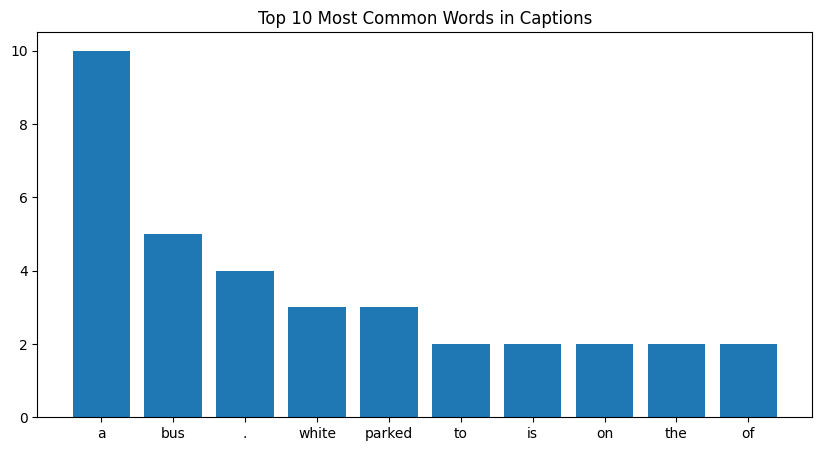

In [11]:
# Continue after displaying the captions

from nltk.tokenize import word_tokenize

# Tokenize the captions
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())  # Tokenizing each caption and converting to lowercase
    print(f"Caption: {caption}")
    print(f"Tokens: {tokens}")

# Collect all tokens to analyze word frequency
from collections import Counter

all_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())
    all_tokens.extend(tokens)

# Count word frequencies
word_freq = Counter(all_tokens)
print(f"\nMost common words:\n{word_freq.most_common(10)}")

# Visualize the word frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Captions')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Caption:  A white bus parked at a stop next to a crowd.
Preprocessed Tokens: ['white', 'bus', 'parked', 'stop', 'next', 'crowd']
Caption: THERE IS A BUS PARKED ON THE SIDE OF THE STREET
Preprocessed Tokens: ['bus', 'parked', 'side', 'street']
Caption: A white bus is pulled up to a sidewalk.
Preprocessed Tokens: ['white', 'bus', 'pulled', 'sidewalk']
Caption: Passengers standing outside a green and white tour bus.
Preprocessed Tokens: ['passengers', 'standing', 'outside', 'green', 'white', 'tour', 'bus']
Caption: A group of people stand on a path outside a parked bus. 
Preprocessed Tokens: ['group', 'people', 'stand', 'path', 'outside', 'parked', 'bus']

Most common preprocessed words:
[('bus', 5), ('white', 3), ('parked', 3), ('outside', 2), ('stop', 1), ('next', 1), ('crowd', 1), ('side', 1), ('street', 1), ('pulled', 1)]


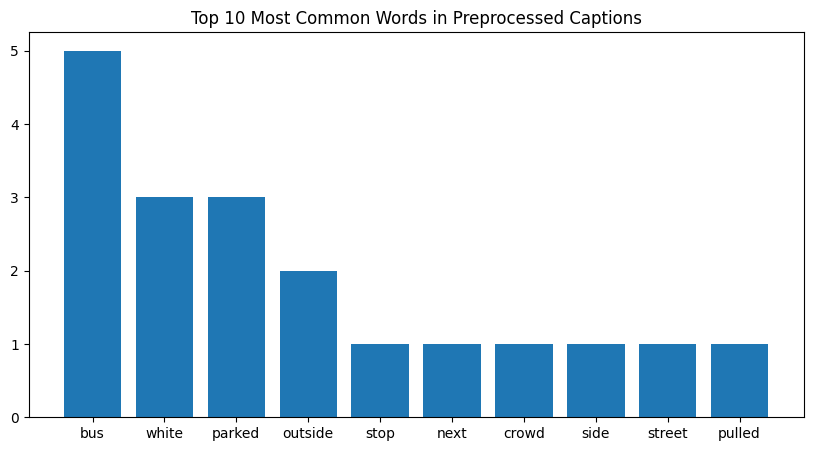

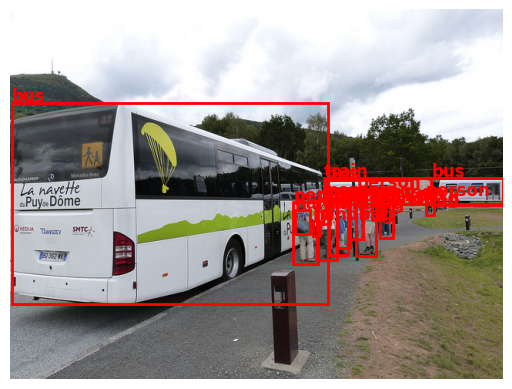


Objects detected in the image:
- bus
- bus
- person
- person
- person
- bus
- person
- person
- person
- handbag
- handbag
- handbag
- person
- person
- person
- train
- backpack
- handbag

Relationship between objects and captions:

Caption:  A white bus parked at a stop next to a crowd.
Objects mentioned in caption:
  - bus (mentioned)
  - bus (mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - bus (mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - handbag (not mentioned)
  - handbag (not mentioned)
  - handbag (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - train (not mentioned)
  - backpack (not mentioned)
  - handbag (not mentioned)

Caption: THERE IS A BUS PARKED ON THE SIDE OF THE STREET
Objects mentioned in caption:
  - bus (mentioned)
  - bus (mentioned)
  - person (not mentioned)
  - person (not mentioned)
  - person (not mentioned)


In [12]:
import string
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the captions and remove punctuation and stopwords
def preprocess_caption(caption):
    tokens = word_tokenize(caption.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Preprocess and display the captions
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    print(f"Caption: {caption}")
    print(f"Preprocessed Tokens: {tokens}")

# Collect all tokens after preprocessing
preprocessed_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    preprocessed_tokens.extend(tokens)

# Count word frequencies again after preprocessing
word_freq_preprocessed = Counter(preprocessed_tokens)
print(f"\nMost common preprocessed words:\n{word_freq_preprocessed.most_common(10)}")

# Visualize the word frequencies after preprocessing
words, counts = zip(*word_freq_preprocessed.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Preprocessed Captions')
plt.show()

# Visualize the objects in the image using bounding boxes
# Get all annotation IDs for the image (objects)
annIds_objects = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
anns_objects = coco.loadAnns(annIds_objects)

# Visualize the image with bounding boxes
plt.imshow(I)
plt.axis('off')

# Loop over each object annotation to draw bounding boxes
for obj in anns_objects:
    bbox = obj['bbox']  # [x, y, width, height]
    category_id = obj['category_id']
    category = coco.loadCats(category_id)[0]['name']  # Get the category name (e.g., "person", "dog")

    # Draw bounding box (x, y, width, height)
    rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)
    
    # Label each object with its category name
    plt.text(bbox[0], bbox[1] - 2, category, color='red', fontsize=12, weight='bold')

plt.show()

# Display the objects detected in the image
print("\nObjects detected in the image:")
for obj in anns_objects:
    category = coco.loadCats(obj['category_id'])[0]['name']
    print(f"- {category}")

# Explore relationships between objects and captions (basic)
print("\nRelationship between objects and captions:")
for ann in anns:
    caption = ann['caption']
    print(f"\nCaption: {caption}")
    print("Objects mentioned in caption:")
    for obj in anns_objects:
        category = coco.loadCats(obj['category_id'])[0]['name']
        if category in caption.lower():
            print(f"  - {category} (mentioned)")
        else:
            print(f"  - {category} (not mentioned)")


In [13]:
import requests
from PIL import Image
from io import BytesIO
from torch.utils.data import Dataset

from torch.utils.data import Dataset
import torch

# In the COCODataset class
class COCODataset(Dataset):
    def __init__(self, coco, coco_caps, transform=None):
        self.coco = coco
        self.coco_caps = coco_caps
        self.ids = list(coco.anns.keys())  # Image annotation IDs
        self.transform = transform
    
    def __len__(self):
        return len(self.ids)  # Number of annotations

    def __getitem__(self, idx):
        ann_id = self.ids[idx]
        img_id = self.coco.anns[ann_id]['image_id']
        img = self.coco.loadImgs(img_id)[0]

        # Fetch the image from the URL with error handling
        try:
            url = img['coco_url']
            response = requests.get(url)
            response.raise_for_status()  # Raise an error for bad HTTP responses
            I = Image.open(BytesIO(response.content)).convert("RGB")
        except requests.RequestException as e:
            print(f"Failed to fetch image {img_id} from {url}: {e}")
            return None, None
        except Exception as e:
            print(f"Error processing image {img_id}: {e}")
            return None, None

        # Apply transformations
        if self.transform:
            I = self.transform(I)

        # Get caption
        annIds = self.coco_caps.getAnnIds(imgIds=img_id)
        anns = self.coco_caps.loadAnns(annIds)
        if len(anns) > 0:
            caption = anns[0]['caption']  # Use first caption (or modify for multi-caption use)
        else:
            caption = ""  # Handle the case where no captions are available

        # Debug print statements
        #print('[INFO] Image type:', type(I))
        #print('[INFO] Caption type:', type(caption))

        return I, caption
